In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os 

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
database_url = os.getenv('database_url')

sql_statement = '''select * from {}.{}'''.format('merged_data', 'merged_data_table')
df_ = pd.read_sql_query(sql_statement, database_url)
df_

,crash_date,crash_time,borough,zip_code,location_latitude,location_longitude,location_location,on_street_name,off_street_name,cross_street_name,...,Temp,Dew,humidity,Wind Cardinal,Wind Speed,Wind Gust,Pressure List,Precip Rate,Condition,station
0,2014-05-03,9:52,BROOKLYN,11217,40.6884588,-73.9827137,"(40.6884588, -73.9827137)",LIVINGSTON STREET,None,HANOVER PLACE,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
1,2014-05-03,9:59,STATEN ISLAND,10305,40.5847883,-74.0884973,"(40.5847883, -74.0884973)",SEAVIEW AVENUE,None,MASON AVENUE,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
2,2014-05-03,10:00,MANHATTAN,10039,40.8291633,-73.9372668,"(40.8291633, -73.9372668)",WEST 155 STREET,None,8 AVENUE,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
3,2014-05-03,10:00,BRONX,10451,40.8246333,-73.9105876,"(40.8246333, -73.9105876)",WASHINGTON AVENUE,None,EAST 163 STREET,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
4,2014-05-03,10:09,BROOKLYN,11206,40.6963525,-73.940706,"(40.6963525, -73.940706)",MYRTLE AVENUE,None,MARCUS GARVEY BOULEVARD,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847634,2014-05-03,9:45,None,None,None,None,None,None,None,None,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
1847635,2014-05-03,9:45,MANHATTAN,10035,40.7986267,-73.9395205,"(40.7986267, -73.9395205)",EAST 117 STREET,None,3 AVENUE,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
1847636,2014-05-03,9:45,MANHATTAN,10128,40.7785518,-73.9512482,"(40.7785518, -73.9512482)",2 AVENUE,None,EAST 87 STREET,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK
1847637,2014-05-03,9:50,MANHATTAN,10035,40.8083355,-73.9408591,"(40.8083355, -73.9408591)",WEST 128 STREET,None,5 AVENUE,...,63,39,41,SW,10,0,29.88,0,Partly Cloudy,KJFK


In [5]:
final_df = df_[['crash_date', 'crash_time', 'zip_code', 'location_latitude',
       'location_longitude', 'number_of_persons_injured',
       'number_of_persons_killed', 'Temp', 'Condition', 'Precip Rate', 'Dew', 'Wind Speed',]]

In [6]:
final_df.reset_index(inplace=True)
del final_df['index']
final_df

,crash_date,crash_time,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed
0,2014-05-03,9:52,11217,40.6884588,-73.9827137,0.0,0.0,63,Partly Cloudy,0,39,10
1,2014-05-03,9:59,10305,40.5847883,-74.0884973,0.0,0.0,63,Partly Cloudy,0,39,10
2,2014-05-03,10:00,10039,40.8291633,-73.9372668,0.0,0.0,63,Partly Cloudy,0,39,10
3,2014-05-03,10:00,10451,40.8246333,-73.9105876,0.0,0.0,63,Partly Cloudy,0,39,10
4,2014-05-03,10:09,11206,40.6963525,-73.940706,0.0,0.0,63,Partly Cloudy,0,39,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1847634,2014-05-03,9:45,None,None,None,0.0,0.0,63,Partly Cloudy,0,39,10
1847635,2014-05-03,9:45,10035,40.7986267,-73.9395205,0.0,0.0,63,Partly Cloudy,0,39,10
1847636,2014-05-03,9:45,10128,40.7785518,-73.9512482,1.0,0.0,63,Partly Cloudy,0,39,10
1847637,2014-05-03,9:50,10035,40.8083355,-73.9408591,0.0,0.0,63,Partly Cloudy,0,39,10


In [8]:
final_df['crash_time'] = pd.to_datetime(final_df['crash_time'])

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
def transform_time(x):
    if (x.hour > 4) and (x.hour <= 8):
        return 'Early Morning'
    elif (x.hour > 8) and (x.hour <= 12):
        return 'Morning'
    elif (x.hour > 12) and (x.hour <= 16):
        return'Noon'
    elif (x.hour > 16) and (x.hour <= 20) :
        return 'Evening'
    elif (x.hour > 20):
        return'Night'
    elif (x.hour <= 4):
        return'Late Night'

final_df['day_time'] = final_df['crash_time'].apply(transform_time)

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [10]:
final_df = final_df.dropna(axis=0, subset=['zip_code', 'location_latitude', 'location_longitude'])

In [11]:
corr_df = final_df

In [12]:
final_df['crash_date'] = pd.to_datetime(final_df['crash_date'])
final_df['crash_month'] = final_df['crash_date'].dt.month
final_df['crash_day'] = final_df['crash_date'].dt.day
del final_df['crash_time']
del final_df['crash_date']
final_df

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day
0,11217,40.6884588,-73.9827137,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
1,10305,40.5847883,-74.0884973,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
2,10039,40.8291633,-73.9372668,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
3,10451,40.8246333,-73.9105876,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
4,11206,40.6963525,-73.940706,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847633,11236,40.6462644,-73.912686,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
1847635,10035,40.7986267,-73.9395205,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
1847636,10128,40.7785518,-73.9512482,1.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3
1847637,10035,40.8083355,-73.9408591,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3


In [13]:
final_df['helper1'] =   final_df['number_of_persons_killed']*3 + final_df['number_of_persons_injured']*1
final_df

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day,helper1
0,11217,40.6884588,-73.9827137,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
1,10305,40.5847883,-74.0884973,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
2,10039,40.8291633,-73.9372668,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
3,10451,40.8246333,-73.9105876,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
4,11206,40.6963525,-73.940706,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847633,11236,40.6462644,-73.912686,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
1847635,10035,40.7986267,-73.9395205,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0
1847636,10128,40.7785518,-73.9512482,1.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,1.0
1847637,10035,40.8083355,-73.9408591,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,0.0


In [14]:
def severity_calculate(x):
    if (x > 3):
        return 'Very High'
    elif (x > 2):
        return 'High'
    elif (x > 1):
        return 'Medium'
    else:
        return 'Low'

final_df['hazard_level'] = final_df['helper1'].apply(severity_calculate)
del final_df['helper1']

/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
corr_df

,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day,hazard_level
0,11217,40.6884588,-73.9827137,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1,10305,40.5847883,-74.0884973,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
2,10039,40.8291633,-73.9372668,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
3,10451,40.8246333,-73.9105876,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
4,11206,40.6963525,-73.940706,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847633,11236,40.6462644,-73.912686,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847635,10035,40.7986267,-73.9395205,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847636,10128,40.7785518,-73.9512482,1.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847637,10035,40.8083355,-73.9408591,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low


In [15]:
le1 = LabelEncoder()
encoded_corr_df = corr_df[corr_df.columns[:]].apply(le1.fit_transform)
encoded_corr_df.corr()

,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day,hazard_level
zip_code,1.000000,-0.386088,-0.553838,0.056422,0.002484,-0.017335,-0.000670,-0.002825,-0.011400,0.004723,-0.015872,-0.018652,-0.002344,0.028973
location_latitude,-0.386088,1.000000,-0.254813,-0.029216,-0.001942,0.000362,-0.001973,0.000857,0.001256,-0.004666,-0.009241,-0.001554,0.001571,-0.014577
location_longitude,-0.553838,-0.254813,1.000000,-0.042482,-0.001752,0.005196,0.000731,0.002492,-0.001710,0.001562,0.028162,0.005128,-0.000375,-0.025079
number_of_persons_injured,0.056422,-0.029216,-0.042482,1.000000,0.052011,0.029700,0.001590,0.000215,0.027967,-0.001133,-0.016975,0.015465,0.000725,0.467782
number_of_persons_killed,0.002484,-0.001942,-0.001752,0.052011,1.000000,0.000216,-0.002025,0.000013,0.001950,-0.001051,-0.004457,0.000842,-0.001001,-0.023217
Temp,-0.017335,0.000362,0.005196,0.029700,0.000216,1.000000,0.169835,0.013765,0.886096,-0.140790,0.059780,0.298319,0.020487,0.009593
Condition,-0.000670,-0.001973,0.000731,0.001590,-0.002025,0.169835,1.000000,-0.002581,0.088374,0.074845,0.059506,0.024003,0.006249,0.000602
Precip Rate,-0.002825,0.000857,0.002492,0.000215,0.000013,0.013765,-0.002581,1.000000,0.025636,0.002039,0.002964,0.001251,0.002477,0.000245
Dew,-0.011400,0.001256,-0.001710,0.027967,0.001950,0.886096,0.088374,0.025636,1.000000,-0.230072,0.002975,0.303636,0.006413,0.008849
Wind Speed,0.004723,-0.004666,0.001562,-0.001133,-0.001051,-0.140790,0.074845,0.002039,-0.230072,1.000000,0.044309,-0.093606,0.016225,-0.001357


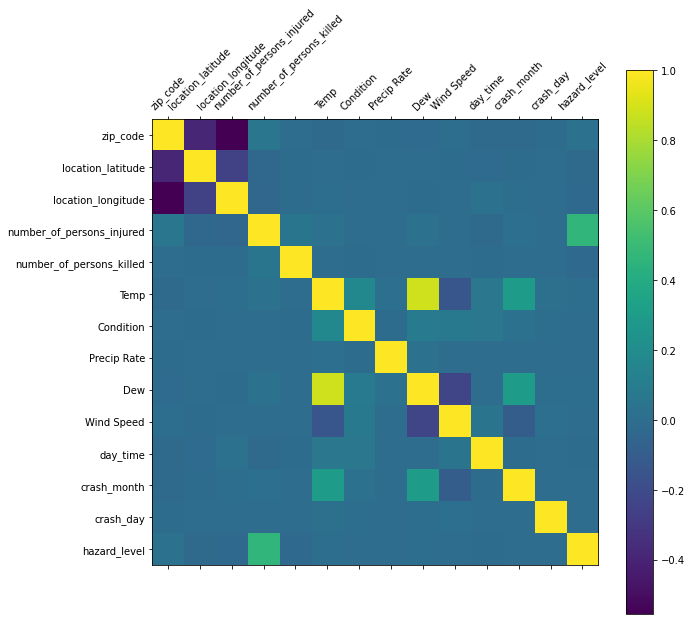

In [17]:
alp = ['zip_code', 'location_latitude', 'location_longitude',
       'number_of_persons_injured', 'number_of_persons_killed', 'Temp',
       'Condition', 'Precip Rate', 'Dew', 'Wind Speed', 'day_time',
       'crash_month', 'crash_day', 'hazard_level']

#plt.matshow(final_df.corr())
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(encoded_corr_df.corr(), interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(alp))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(alp, rotation=45)
ax.set_yticklabels(alp)

plt.savefig('Correlation matrix',dpi=300);
plt.show()

In [18]:
final_df

,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day,hazard_level
0,11217,40.6884588,-73.9827137,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1,10305,40.5847883,-74.0884973,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
2,10039,40.8291633,-73.9372668,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
3,10451,40.8246333,-73.9105876,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
4,11206,40.6963525,-73.940706,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847633,11236,40.6462644,-73.912686,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847635,10035,40.7986267,-73.9395205,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847636,10128,40.7785518,-73.9512482,1.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low
1847637,10035,40.8083355,-73.9408591,0.0,0.0,63,Partly Cloudy,0,39,10,Morning,5,3,Low


In [19]:
le = LabelEncoder()
encoded_df = final_df[final_df.columns[:]].apply(le.fit_transform)

In [20]:
#encoded_df.loc[encoded_df['Severity'] >2]
encoded_df

,zip_code,location_latitude,location_longitude,number_of_persons_injured,number_of_persons_killed,Temp,Condition,Precip Rate,Dew,Wind Speed,day_time,crash_month,crash_day,hazard_level
0,197,45738,66778,0,0,63,35,0,59,7,3,4,2,1
1,105,7562,79791,0,0,63,35,0,59,7,3,4,2,1
2,42,96690,53463,0,0,63,35,0,59,7,3,4,2,1
3,119,95279,45627,0,0,63,35,0,59,7,3,4,2,1
4,186,49241,54673,0,0,63,35,0,59,7,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847633,215,28653,46292,0,0,63,35,0,59,7,3,4,2,1
1847635,38,88205,54248,0,0,63,35,0,59,7,3,4,2,1
1847636,70,84232,58061,1,0,63,35,0,59,7,3,4,2,1
1847637,38,90373,54720,0,0,63,35,0,59,7,3,4,2,1


In [21]:
X = np.array(encoded_df[['zip_code', 'day_time', 'Temp', 'Condition', 'Dew', 'Wind Speed', 'Precip Rate',
                        'number_of_persons_injured', 'number_of_persons_killed']])
y = np.array(encoded_df['hazard_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
# Logistic Regression
clf_lr = LogisticRegression(random_state=0, max_iter=45).fit(X_train, y_train)

/home/ecbm4040/envTF24/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
y_pred_lr = clf_lr.predict(X_test)
pred_prob_lr = clf_lr.predict_proba(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", lr_acc)

0.9593174595570034

In [23]:
# Gradient Boost Classifier
clf_gbc = GradientBoostingClassifier(n_estimators=19, learning_rate=0.03,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

In [24]:
y_pred_gbc = clf_gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred_gbc)
pred_prob_gbc = clf_gbc.predict_proba(X_test)
print("Gradient Boosting Classifier: ", gbc_acc)

Gradient Boosting Classifier:  0.9710271642792124


In [33]:
# SVM
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [34]:
y_pred_svm = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
#print(clf.predict([[243, 2, 36, 2]]))
print("SVM Accuracy: ", svm_acc)

SVM Accuracy:  0.9999920152030534


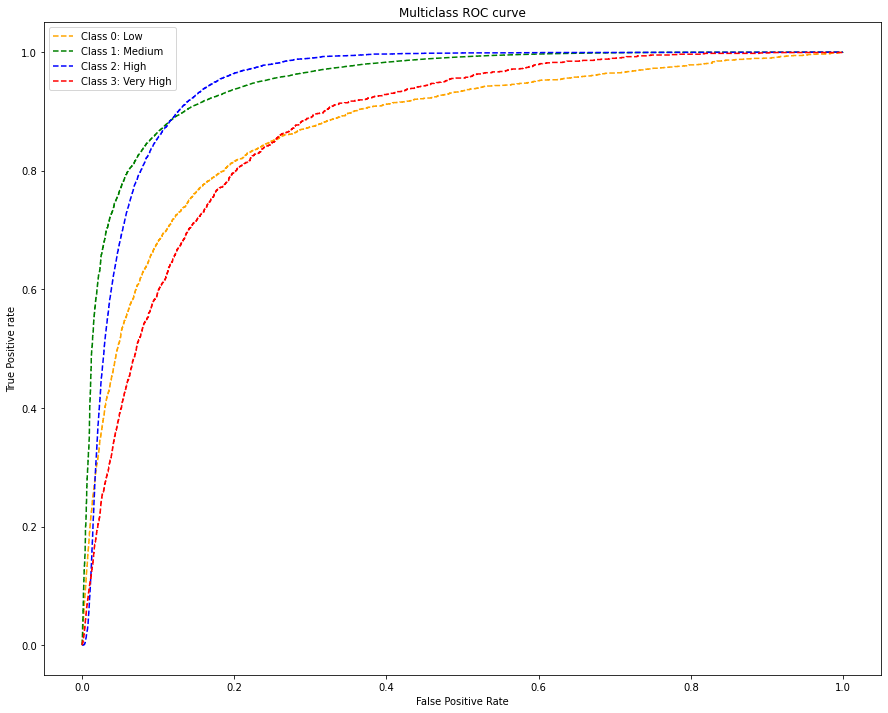

In [32]:
# multi-class classification LR
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_lr[:,i], pos_label=i)

# plotting
plt.figure(figsize=(15, 12))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0: Low')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1: Medium')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2: High')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3: Very High')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass LR ROC',dpi=300);